<a href="https://colab.research.google.com/github/farheenfathimaa/Medical-Image-Analysis-with-CNN/blob/main/Medical_Image_Analysis_with_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Medical Image Analysis with CNN

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

## Data Preprocessing

In [2]:
def loading_preprossing(path):
    img_list = []
    for img_path in os.listdir(path):
        img = cv2.imread(path+'/'+img_path)
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        img = cv2.resize(img,(255,255))
        img = img /255
        img_list.append(img)
    return img_list

In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [4]:
# Update the paths to your dataset in Google Drive
train_class1 = loading_preprossing('/content/drive/MyDrive/team7/chest_xray/train/NORMAL')
train_class2 = loading_preprossing('/content/drive/MyDrive/team7/chest_xray/train/PNEUMONIA')

In [5]:
train_labels = [0]*len(train_class1) + [1] * len(train_class2)

In [6]:
train_list = train_class1 + train_class2

In [7]:
print("length of train data")
print("length of data is ",len(train_list))
print("length of labels is ",len(train_labels))

length of train data
length of data is  5216
length of labels is  5216


In [8]:
test_class1 = loading_preprossing('/content/drive/MyDrive/team7/chest_xray/test/NORMAL')
test_class2 = loading_preprossing('/content/drive/MyDrive/team7/chest_xray/test/PNEUMONIA')

In [9]:
test_labels = [0]*len(test_class1) + [1] * len(test_class2)

In [10]:
test_list = test_class1 + test_class2

In [11]:
print("length of test data")
print("length of data is ",len(test_list))
print("length of labels is ",len(test_labels))

length of test data
length of data is  624
length of labels is  624


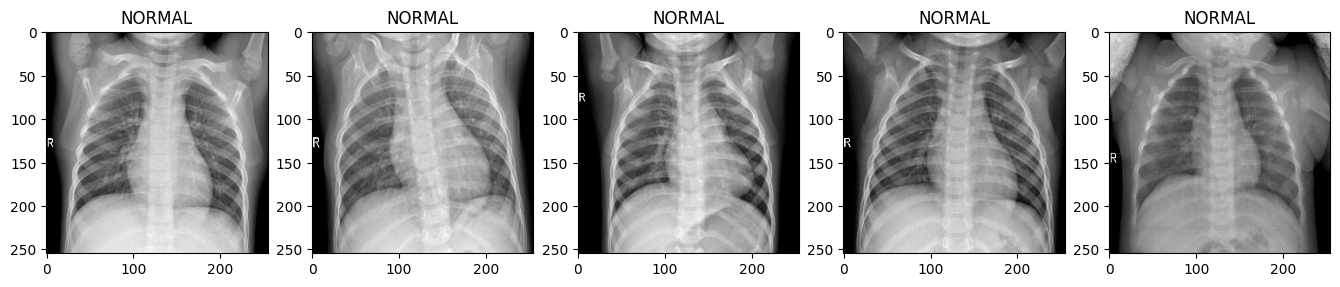

In [12]:
plt.figure(figsize = (20,20))
for i , (img,label) in enumerate(zip(train_list[:5], train_labels[:5])):
    plt.subplot(5,6,i+1)
    plt.imshow(img)
    if label == 0:
        title ="NORMAL"
    elif label == 1:
        title ="PNEUMONIA"
    plt.title(title)

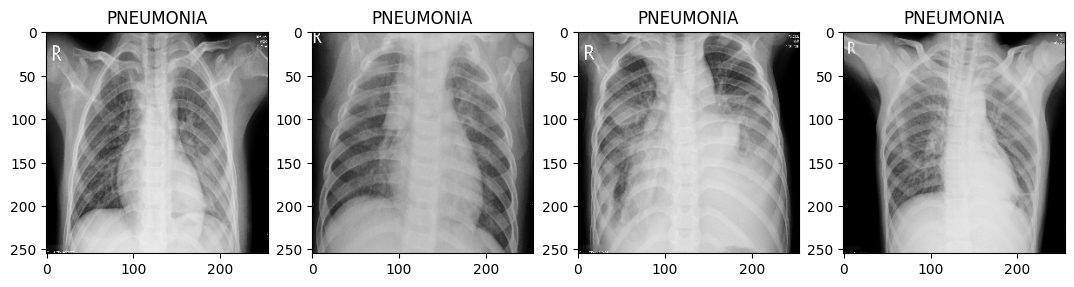

In [13]:
plt.figure(figsize = (20,20))
for i , (img,label) in enumerate(zip(train_list[-5:-1], train_labels[-5:-1])):
    plt.subplot(5,6,i+1)
    plt.imshow(img)
    if label == 0:
        title ="NORMAL"
    elif label == 1:
        title ="PNEUMONIA"
    plt.title(title)

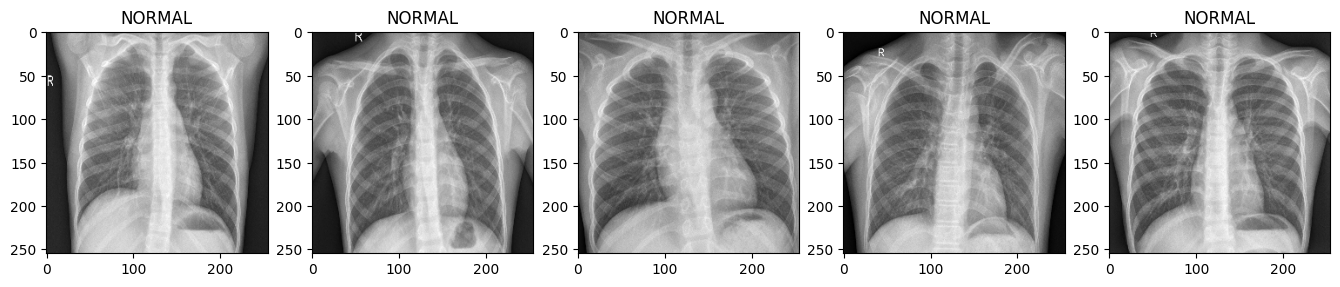

In [14]:
plt.figure(figsize = (20,20))
for i , (img,label) in enumerate(zip(test_list[:5], test_labels[:5])):
    plt.subplot(5,6,i+1)
    plt.imshow(img)
    if label == 0:
        title ="NORMAL"
    elif label == 1:
        title ="PNEUMONIA"
    plt.title(title)

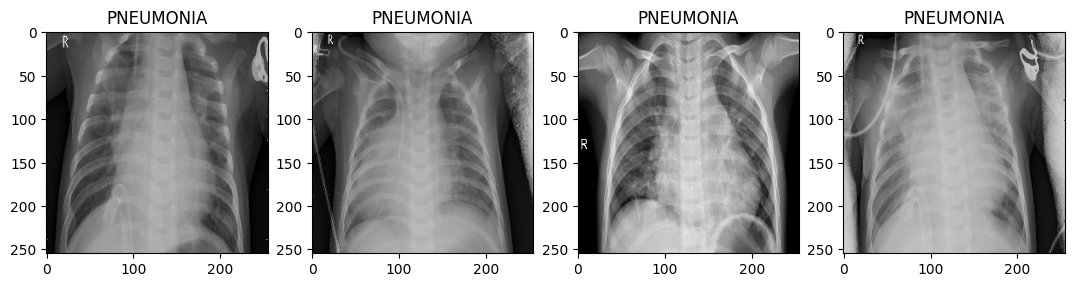

In [15]:
plt.figure(figsize = (20,20))
for i , (img,label) in enumerate(zip(test_list[-5:-1], test_labels[-5:-1])):
    plt.subplot(5,6,i+1)
    plt.imshow(img)
    if label == 0:
        title ="NORMAL"
    elif label == 1:
        title ="PNEUMONIA"
    plt.title(title)

In [16]:
X_train = np.array(train_list)
X_test = np.array(test_list)

In [17]:
import tensorflow as tf
from tensorflow.keras import models , layers ,utils

In [18]:
y_train = utils.to_categorical(train_labels,num_classes = 2)
y_test = utils.to_categorical(test_labels,num_classes = 2)

In [19]:
y_train.shape, y_test.shape

((5216, 2), (624, 2))

## Model Building

In [20]:
model = models.Sequential()
model.add(layers.Conv2D(32,kernel_size = (3,3),padding = 'same',strides=1,activation = 'relu',input_shape=(X_train[0].shape)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(16,kernel_size = (3,3),padding = 'same',strides=1,activation = 'relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 255, 255, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 127, 127, 16)      4624      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 63, 63, 16)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 63504)             0         
                                                                 
 dense (Dense)               (None, 64)                4

In [21]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
163/163 [==============================] - 276s 2s/step - loss: 0.3031 - accuracy: 0.8855 - val_loss: 0.9027 - val_accuracy: 0.7099
Epoch 2/10
163/163 [==============================] - 263s 2s/step - loss: 0.1158 - accuracy: 0.9576 - val_loss: 0.6928 - val_accuracy: 0.7949
Epoch 3/10
163/163 [==============================] - 262s 2s/step - loss: 0.0729 - accuracy: 0.9728 - val_loss: 1.2362 - val_accuracy: 0.7228
Epoch 4/10
163/163 [==============================] - 261s 2s/step - loss: 0.0538 - accuracy: 0.9806 - val_loss: 0.9828 - val_accuracy: 0.7756
Epoch 5/10
163/163 [==============================] - 262s 2s/step - loss: 0.0343 - accuracy: 0.9881 - val_loss: 2.5983 - val_accuracy: 0.6843
Epoch 6/10
163/163 [==============================] - 261s 2s/step - loss: 0.0483 - accuracy: 0.9829 - val_loss: 1.3251 - val_accuracy: 0.7821
Epoch 7/10
163/163 [==============================] - 259s 2s/step - loss: 0.0286 - accuracy: 0.9879 - val_loss: 2.0964 - val_accuracy: 0.7099

In [23]:
y_pred = model.predict(X_test)
y_pred = np.argmax(np.round(y_pred),axis=1)
y_pred

20/20 [==============================] - 9s 457ms/step


array([1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

##Model Evaluation and Experimentation

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns

In [25]:
accuracy = accuracy_score(test_labels, y_pred)
precision = precision_score(test_labels, y_pred)
recall = recall_score(test_labels, y_pred)
f1 = f1_score(test_labels, y_pred)

In [26]:
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.78


In [27]:
print(f'Precision: {precision:.2f}')

Precision: 0.74


In [28]:
print(f'Recall: {recall:.2f}')

Recall: 0.99


In [29]:
print(f'F1 Score: {f1:.2f}')

F1 Score: 0.85


In [30]:
cm = confusion_matrix(test_labels, y_pred)

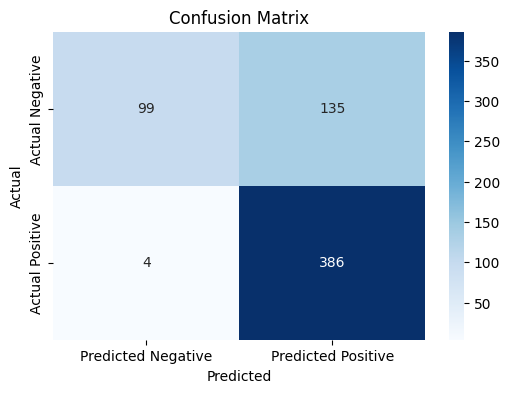

In [31]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

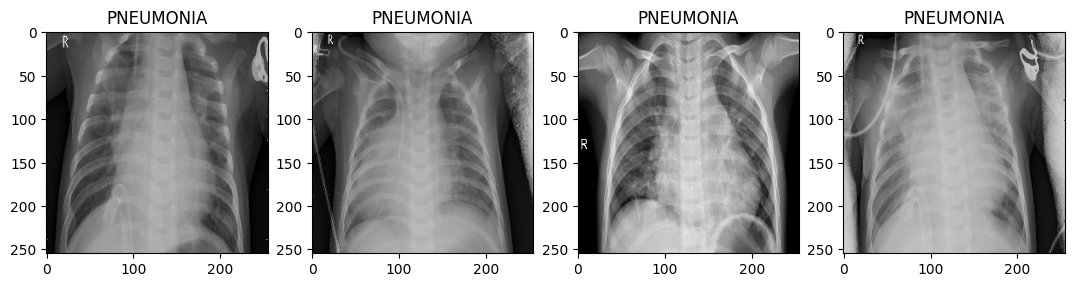

In [32]:
plt.figure(figsize = (20,20))
for i , (img,label) in enumerate(zip(test_list[-5:-1], y_pred[-5:-1])):
    plt.subplot(5,6,i+1)
    plt.imshow(img)
    if label == 0:
        title ="NORMAL"
    elif label == 1:
        title ="PNEUMONIA"
    plt.title(title)

## Adding doctor's data

In [35]:
import random

# Sample doctor data
doctors = [
    {
        "name": "Dr. John Smith",
        "specialty": "Pulmonologist",
        "contact": "john.smith@example.com",
        "phone": "+1234567890"
    },
    {
        "name": "Dr. Emily Johnson",
        "specialty": "General Practitioner",
        "contact": "emily.johnson@example.com",
        "phone": "+0987654321"
    },
    {
        "name": "Dr. Sarah Brown",
        "specialty": "Infectious Disease Specialist",
        "contact": "sarah.brown@example.com",
        "phone": "+1122334455"
    }
]

# Function to contact the required doctor based on prediction
def contact_doctor(prediction):
    if prediction == 1:  # If pneumonia is predicted
        doctor = doctors[0]  # Contact the pulmonologist
    else:  # If normal is predicted
        doctor = doctors[1]  # Contact the general practitioner

    print(f"Contacting {doctor['name']} ({doctor['specialty']})...")
    print(f"Email: {doctor['contact']}")
    print(f"Phone: {doctor['phone']}")
    print("Please reach out for further consultation.\n")

# Example usage after predictions
random_patients = random.sample(range(len(y_pred)), 3)  # Select 3 random patients
for i in random_patients:
    pred = y_pred[i]  # Get the prediction for the selected patient
    print(f"Patient {i+1}: Predicted label = {'PNEUMONIA' if pred == 1 else 'NORMAL'}")
    contact_doctor(pred)

Patient 154: Predicted label = PNEUMONIA
Contacting Dr. John Smith (Pulmonologist)...
Email: john.smith@example.com
Phone: +1234567890
Please reach out for further consultation.

Patient 342: Predicted label = PNEUMONIA
Contacting Dr. John Smith (Pulmonologist)...
Email: john.smith@example.com
Phone: +1234567890
Please reach out for further consultation.

Patient 511: Predicted label = PNEUMONIA
Contacting Dr. John Smith (Pulmonologist)...
Email: john.smith@example.com
Phone: +1234567890
Please reach out for further consultation.



In [36]:
model.save('CNN_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
